In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [12]:
train = pd.read_csv("train.csv", index_col="PassengerId")
test = pd.read_csv("test.csv", index_col="PassengerId")

In [13]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train = train.drop(columns=['Name', 'Ticket', 'Cabin'])

In [15]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

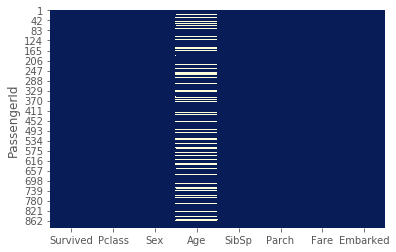

In [16]:
_ = sns.heatmap(train.isnull(), cmap="YlGnBu_r", cbar=False)

In [17]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [18]:
sex_survived = train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

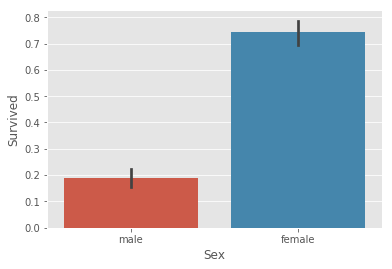

In [19]:
_ = sns.barplot(x="Sex", y="Survived", data=train)

In [63]:
criteria = [train['Age'].between(0.0, 20.9), train['Age'].between(21.0, 50.9), train['Age'].between(51.0, 80.9)]
values = [1, 2, 3]
train['Age_map'] = np.select(criteria, values)

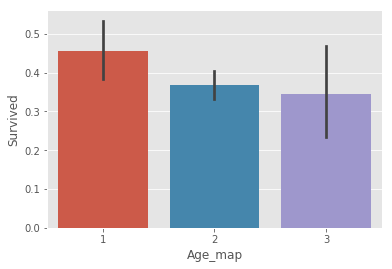

In [64]:
_ = sns.barplot(x="Age_map", y="Survived", data=train)

In [65]:
train[['Age_map', 'Survived']].groupby('Age_map', as_index=False).mean()

,Age_map,Survived
0,1,0.455556
1,2,0.367852
2,3,0.343750


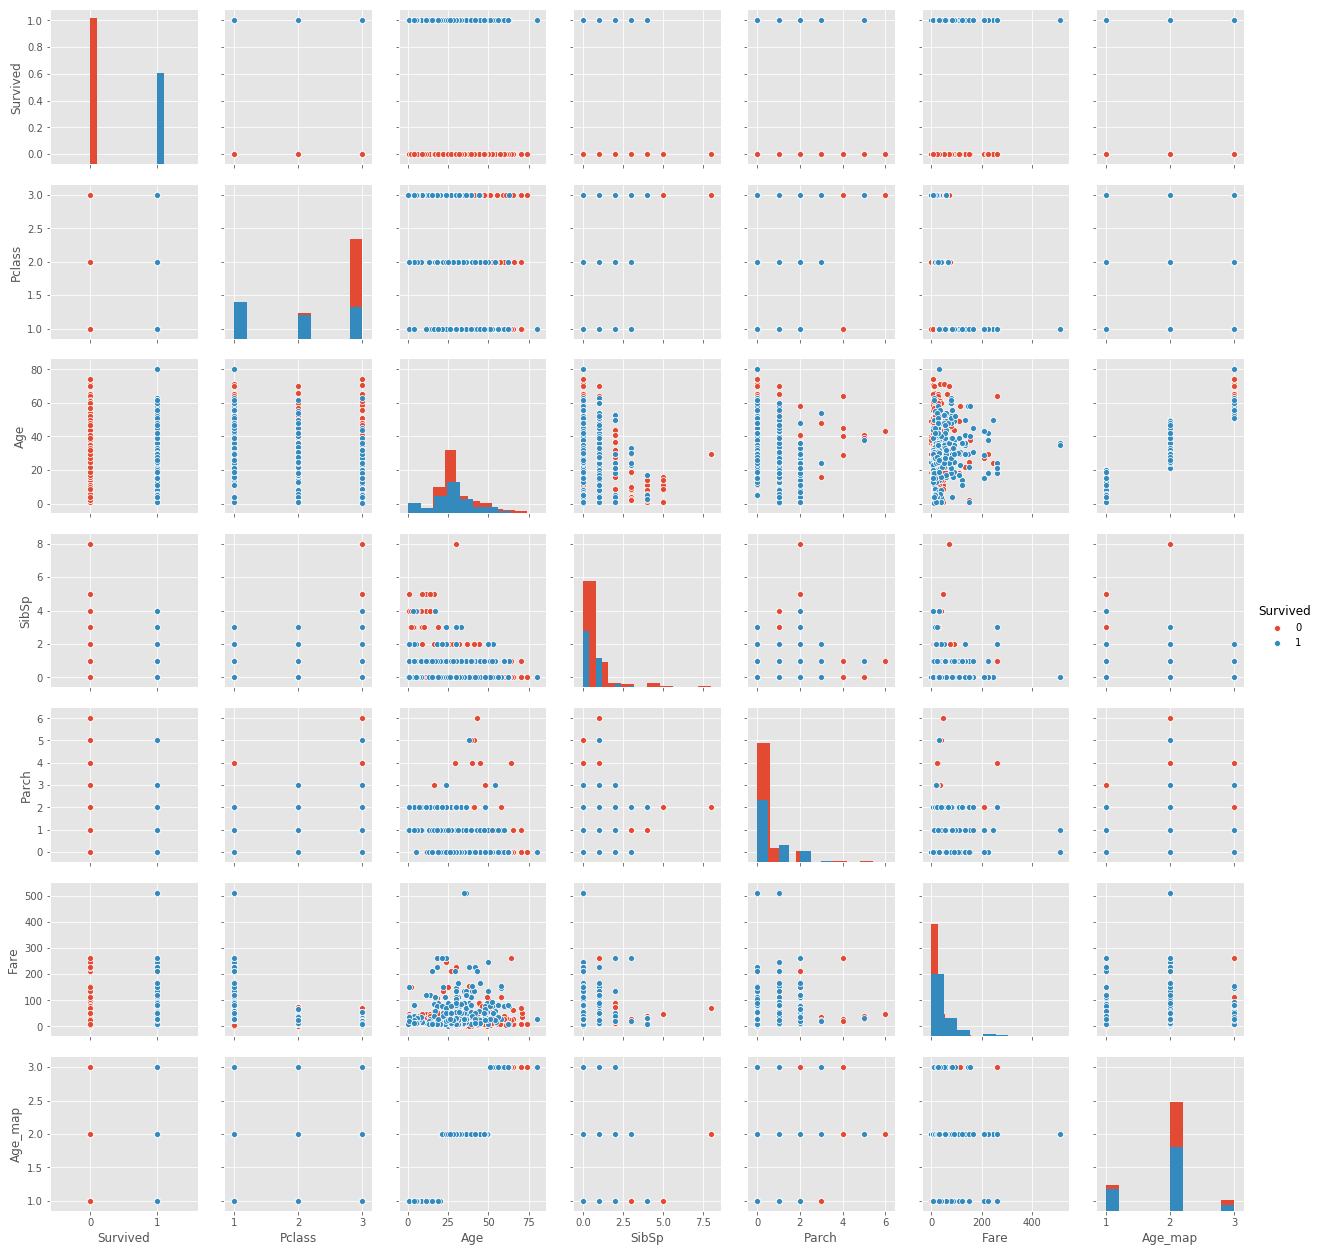

In [90]:
sns.pairplot(data=train, hue='Survived', diag_kind='hist')